# Imports

In [1]:
# Numerai API
from numerapi import NumerAPI

# data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# other
import gc
import json

# Download data

In [2]:
napi = NumerAPI()
round = napi.get_current_round()
era = round + 695

filenames = napi.list_datasets()

napi.download_dataset('v4/features.json', 'data/features.json')
napi.download_dataset('v4/train_int8.parquet', 'data/train.parquet')
napi.download_dataset('v4/validation_int8.parquet', 'data/validation.parquet')
napi.download_dataset('v4/live_int8.parquet', f'data/live_{round}.parquet')

2022-08-02 20:44:08,897 INFO numerapi.utils: target file already exists
2022-08-02 20:44:08,899 INFO numerapi.utils: download complete
2022-08-02 20:44:10,470 INFO numerapi.utils: target file already exists
2022-08-02 20:44:10,473 INFO numerapi.utils: download complete
2022-08-02 20:44:11,502 INFO numerapi.utils: target file already exists
2022-08-02 20:44:11,505 INFO numerapi.utils: download complete
2022-08-02 20:44:12,545 INFO numerapi.utils: target file already exists
2022-08-02 20:44:12,546 INFO numerapi.utils: download complete


# Features

- feature sets: `all`, `small`, `medium`, `v2_equivalent_features`, `v3_equivalent_features`, `fncv3_features`
- feature groups: `features_all[0:210]`, `features_all[210:420]`, `features_all[420:630]`, `features_all[630:840]`, `features_all[840:1050]`, `features_all[1050:1191]`

In [3]:
with open('data/features.json', 'r') as f:
    FEATURE_METADATA = json.load(f)
del f

FEATURES_L = list(FEATURE_METADATA['feature_stats'].keys())
FEATURES_M = FEATURE_METADATA['feature_sets']['medium']
FEATURES_S = FEATURE_METADATA['feature_sets']['small']
FEATURES_2 = FEATURE_METADATA['feature_sets']['v2_equivalent_features']
FEATURES_3 = FEATURE_METADATA['feature_sets']['v3_equivalent_features']
FEATURES_N = FEATURE_METADATA['feature_sets']['fncv3_features']

ERA = 'era'
DATA = 'data_type'
Y_TRUE = 'target_nomi_v4_20'
Y_PRED = 'target_prediction'
Y_RANK = 'prediction' 

X_COLS = FEATURES_L
COLUMNS = [ERA, DATA] + X_COLS + [Y_TRUE]

df_feature_metadata = pd.DataFrame(FEATURE_METADATA['feature_stats'])
df_feature_metadata

feature_honoured_observational_balaamite  \
legacy_uniqueness                                                         0.177814   
spearman_corr_w_target_nomi_20_mean                                      -0.000796   
spearman_corr_w_target_nomi_20_sharpe                                    -0.078689   
spearman_corr_w_target_nomi_20_reversals                                  0.000074   
spearman_corr_w_target_nomi_20_autocorr                                  -0.013665   
spearman_corr_w_target_nomi_20_arl                                        3.650350   

                                          feature_polaroid_vadose_quinze  \
legacy_uniqueness                                               0.241351   
spearman_corr_w_target_nomi_20_mean                             0.000199   
spearman_corr_w_target_nomi_20_sharpe                           0.020379   
spearman_corr_w_target_nomi_20_reversals                        0.000082   
spearman_corr_w_target_nomi_20_autocorr                         0.110503   
spearman_corr_w_target_nomi_20_arl                              3.456954   

                                          feature_untidy_withdrawn_bargeman  \
legacy_uniqueness                                                  0.659092   
spearman_corr_w_target_nomi_20_mean                               -0.000619   
spearman_corr_w_target_nomi_20_sharpe                             -0.067669   
spearman_corr_w_target_nomi_20_reversals                           0.000067   
spearman_corr_w_target_nomi_20_autocorr                            0.036986   
spearman_corr_w_target_nomi_20_arl                                 2.916201   

                                          feature_genuine_kyphotic_trehala  \
legacy_uniqueness                                                 0.234994   
spearman_corr_w_target_nomi_20_mean                               0.001724   
spearman_corr_w_target_nomi_20_sharpe                             0.127591   
spearman_corr_w_target_nomi_20_reversals                          0.000095   
spearman_corr_w_target_nomi_20_autocorr                           0.149465   
spearman_corr_w_target_nomi_20_arl                                3.984733   

                                          feature_unenthralled_sportful_schoolhouse  \
legacy_uniqueness                                                          0.471051   
spearman_corr_w_target_nomi_20_mean                                        0.000661   
spearman_corr_w_target_nomi_20_sharpe                                      0.065213   
spearman_corr_w_target_nomi_20_reversals                                   0.000072   
spearman_corr_w_target_nomi_20_autocorr                                    0.014508   
spearman_corr_w_target_nomi_20_arl                                         3.702128   

                                          feature_divulsive_explanatory_ideologue  \
legacy_uniqueness                                                        0.608926   
spearman_corr_w_target_nomi_20_mean                                     -0.001529   
spearman_corr_w_target_nomi_20_sharpe                                   -0.173158   
spearman_corr_w_target_nomi_20_reversals                                 0.000058   
spearman_corr_w_target_nomi_20_autocorr                                  0.023341   
spearman_corr_w_target_nomi_20_arl                                       3.411765   

                                          feature_ichthyotic_roofed_yeshiva  \
legacy_uniqueness                                                  0.220884   
spearman_corr_w_target_nomi_20_mean                               -0.000623   
spearman_corr_w_target_nomi_20_sharpe                             -0.084122   
spearman_corr_w_target_nomi_20_reversals                           0.000052   
spearman_corr_w_target_nomi_20_autocorr                           -0.066927   
spearman_corr_w_target_nomi_20_arl                                 3.262500   

                                          fea

# Dataframes

## Train

In [4]:
df_trn = pd.read_parquet('data/train.parquet', columns=COLUMNS)
df_trn[ERA] = df_trn[ERA].astype('int32')
df_trn.info(memory_usage='deep')
df_trn

<class 'pandas.core.frame.DataFrame'>
Index: 2420521 entries, n003bba8a98662e4 to nfff2bd38e397265
Columns: 1194 entries, era to target_nomi_v4_20
dtypes: float32(1), int32(1), int8(1191), object(1)
memory usage: 3.0 GB


era data_type  feature_honoured_observational_balaamite  \
id                                                                          
n003bba8a98662e4    1     train                                         4   
n003bee128c2fcfc    1     train                                         2   
n0048ac83aff7194    1     train                                         2   
n00691bec80d3e02    1     train                                         4   
n00b8720a2fdc4f2    1     train                                         4   
...               ...       ...                                       ...   
nffcc1dbdf2212e6  574     train                                         0   
nffd71b7f6a128df  574     train                                         0   
nffde3b371d67394  574     train                                         1   
nfff1a1111b35e84  574     train                                         4   
nfff2bd38e397265  574     train                                         1   

                  feature_polaroid_vadose_quinze  \
id                                                 
n003bba8a98662e4                               2   
n003bee128c2fcfc                               4   
n0048ac83aff7194                               1   
n00691bec80d3e02                               2   
n00b8720a2fdc4f2                               3   
...                                          ...   
nffcc1dbdf2212e6                               1   
nffd71b7f6a128df                               1   
nffde3b371d67394                               1   
nfff1a1111b35e84                               3   
nfff2bd38e397265                               1   

                  feature_untidy_withdrawn_bargeman  \
id                                                    
n003bba8a98662e4                                  4   
n003bee128c2fcfc                                  1   
n0048ac83aff7194                                  3   
n00691bec80d3e02                                  2   
n00b8720a2fdc4f2                                  4   
...                                             ...   
nffcc1dbdf2212e6                                  0   
nffd71b7f6a128df                                  0   
nffde3b371d67394                                  2   
nfff1a1111b35e84                                  2   
nfff2bd38e397265                                  3   

                  feature_genuine_kyphotic_trehala  \
id                                                   
n003bba8a98662e4                                 4   
n003bee128c2fcfc                                 3   
n0048ac83aff7194                                 0   
n00691bec80d3e02                                 3   
n00b8720a2fdc4f2                                 4   
...                                            ...   
nffcc1dbdf2212e6                                 1   
nffd71b7f6a128df                                 4   
nffde3b371d67394                                 1   
nfff1a1111b35e84                                 2   
nfff2bd38e397265                                 0   

                  feature_unenthralled_sportful_schoolhouse  \
id                                                            
n003bba8a98662e4                                          0   
n003bee128c2fcfc                                          0   
n0048ac83aff7194                                          3   
n00691bec80d3e02                                          0   
n00b8720a2fdc4f2                                          0   
...                                                     ...   
nffcc1dbdf2212e6                                          4   
nffd71b7f6a128df                                          2   
nffde3b371d67394                                          3   
nfff1a1111b35e84                                          3   
nfff2bd38e397265                                          2   

                  feature_divulsive_explanatory_ideologue  \
id                                     

## Validation + Test

In [5]:
df_val = pd.read_parquet('data/validation.parquet', columns=COLUMNS)
df_val[ERA] = df_val[ERA].astype('int32')
df_val.info(memory_usage='deep')
df_val

<class 'pandas.core.frame.DataFrame'>
Index: 2283284 entries, n000101811a8a843 to nffff5ac82ea6ec8
Columns: 1194 entries, era to target_nomi_v4_20
dtypes: float32(1), int32(1), int8(1191), object(1)
memory usage: 2.8 GB


era   data_type  feature_honoured_observational_balaamite  \
id                                                                             
n000101811a8a843   575  validation                                         2   
n001e1318d5072ac   575  validation                                         1   
n002a9c5ab785cbb   575  validation                                         1   
n002ccf6d0e8c5ad   575  validation                                         2   
n0051ab821295c29   575  validation                                         2   
...                ...         ...                                       ...   
nffe436918e31d4b  1021        test                                         3   
nffe6e24ae428dba  1021        test                                         4   
nffea6f8670bc927  1021        test                                         0   
nfffa9b12cc2e147  1021        test                                         1   
nffff5ac82ea6ec8  1021        test                                         0   

                  feature_polaroid_vadose_quinze  \
id                                                 
n000101811a8a843                               0   
n001e1318d5072ac                               4   
n002a9c5ab785cbb                               2   
n002ccf6d0e8c5ad                               4   
n0051ab821295c29                               0   
...                                          ...   
nffe436918e31d4b                               3   
nffe6e24ae428dba                               0   
nffea6f8670bc927                               4   
nfffa9b12cc2e147                               3   
nffff5ac82ea6ec8                               0   

                  feature_untidy_withdrawn_bargeman  \
id                                                    
n000101811a8a843                                  4   
n001e1318d5072ac                                  2   
n002a9c5ab785cbb                                  2   
n002ccf6d0e8c5ad                                  2   
n0051ab821295c29                                  0   
...                                             ...   
nffe436918e31d4b                                  1   
nffe6e24ae428dba                                  0   
nffea6f8670bc927                                  3   
nfffa9b12cc2e147                                  0   
nffff5ac82ea6ec8                                  3   

                  feature_genuine_kyphotic_trehala  \
id                                                   
n000101811a8a843                                 0   
n001e1318d5072ac                                 2   
n002a9c5ab785cbb                                 3   
n002ccf6d0e8c5ad                                 4   
n0051ab821295c29                                 1   
...                                            ...   
nffe436918e31d4b                                 4   
nffe6e24ae428dba                                 4   
nffea6f8670bc927                                 4   
nfffa9b12cc2e147                                 1   
nffff5ac82ea6ec8                                 0   

                  feature_unenthralled_sportful_schoolhouse  \
id                                                            
n000101811a8a843                                          3   
n001e1318d5072ac                                          1   
n002a9c5ab785cbb                                          1   
n002ccf6d0e8c5ad                                          2   
n0051ab821295c29                                          0   
...                                                     ...   
nffe436918e31d4b                                          4   
nffe6e24ae428dba                                          4   
nffea6f8670bc927                                          2   
nfffa9b12cc2e147                                          3   
nffff5ac82ea6ec8                                          1   

                  feature_divulsive_explanatory_ideologue  \
i

## Live

In [6]:
df_liv = pd.read_parquet(f'data/live_{round}.parquet', columns=COLUMNS)
df_liv.info(memory_usage='deep')
df_liv

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, n000c39c90abf850 to nfff24c04df3b231
Columns: 1194 entries, era to target_nomi_v4_20
dtypes: float64(1), int8(1191), object(2)
memory usage: 7.1 MB


era data_type  feature_honoured_observational_balaamite  \
id                                                                         
n000c39c90abf850   X      live                                         3   
n0012d9b3dc958bd   X      live                                         1   
n0025d47d3dbbd8e   X      live                                         3   
n002bc4a457beefa   X      live                                         1   
n003038137d7a9e4   X      live                                         0   
...               ..       ...                                       ...   
nffd6948d26dbaef   X      live                                         2   
nffe3ef7f35bdc6f   X      live                                         2   
nffe53510ab40d71   X      live                                         3   
nffe84df93c03cb1   X      live                                         3   
nfff24c04df3b231   X      live                                         0   

                  feature_polaroid_vadose_quinze  \
id                                                 
n000c39c90abf850                               3   
n0012d9b3dc958bd                               0   
n0025d47d3dbbd8e                               1   
n002bc4a457beefa                               0   
n003038137d7a9e4                               4   
...                                          ...   
nffd6948d26dbaef                               3   
nffe3ef7f35bdc6f                               2   
nffe53510ab40d71                               1   
nffe84df93c03cb1                               4   
nfff24c04df3b231                               2   

                  feature_untidy_withdrawn_bargeman  \
id                                                    
n000c39c90abf850                                  0   
n0012d9b3dc958bd                                  0   
n0025d47d3dbbd8e                                  4   
n002bc4a457beefa                                  3   
n003038137d7a9e4                                  4   
...                                             ...   
nffd6948d26dbaef                                  2   
nffe3ef7f35bdc6f                                  3   
nffe53510ab40d71                                  1   
nffe84df93c03cb1                                  0   
nfff24c04df3b231                                  3   

                  feature_genuine_kyphotic_trehala  \
id                                                   
n000c39c90abf850                                 1   
n0012d9b3dc958bd                                 1   
n0025d47d3dbbd8e                                 3   
n002bc4a457beefa                                 0   
n003038137d7a9e4                                 2   
...                                            ...   
nffd6948d26dbaef                                 3   
nffe3ef7f35bdc6f                                 2   
nffe53510ab40d71                                 1   
nffe84df93c03cb1                                 4   
nfff24c04df3b231                                 1   

                  feature_unenthralled_sportful_schoolhouse  \
id                                                            
n000c39c90abf850                                          4   
n0012d9b3dc958bd                                          1   
n0025d47d3dbbd8e                                          1   
n002bc4a457beefa                                          4   
n003038137d7a9e4                                          3   
...                                                     ...   
nffd6948d26dbaef                                          3   
nffe3ef7f35bdc6f                                          2   
nffe53510ab40d71                                          0   
nffe84df93c03cb1                                          4   
nfff24c04df3b231                                          2   

                  feature_divulsive_explanatory_ideologue  \
id                                                 

## Note 

- last era of test set = live set of last week
- in particular, `current_era = current_round + 695`
- therefore, we could fill the `X` in the era column of the live data with the `current_era`, and use the era as a feature

In [7]:
df_tst_last_e = df_val[X_COLS][df_val[ERA]==df_val[ERA][-1]]
df_liv_last_w = pd.read_parquet(f'data/live_{round - 1}.parquet', columns=X_COLS)
print(df_tst_last_e.equals(df_liv_last_w))

True


# Analyse data

## Number of examples as a function of the era

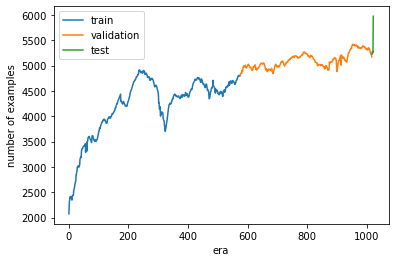

In [8]:
x_trn = df_trn.groupby(ERA).size().index.values
y_trn = df_trn.groupby(ERA).size().values
x_val = df_val[df_val[DATA]=='validation'].groupby(ERA).size().index.values
y_val = df_val[df_val[DATA]=='validation'].groupby(ERA).size().values
x_tst = df_val[df_val[DATA]=='test'].groupby(ERA).size().index.values
y_tst = df_val[df_val[DATA]=='test'].groupby(ERA).size().values

fig, ax = plt.subplots()
ax.plot(x_trn, y_trn, label='train')
ax.plot(x_val, y_val, label='validation')
ax.plot(x_tst, y_tst, label='test')
ax.set_xlabel(ERA)
ax.set_ylabel('number of examples')
ax.legend()

In [9]:
del df_val
del df_liv
gc.collect()

0

## Feature correlation heatmap

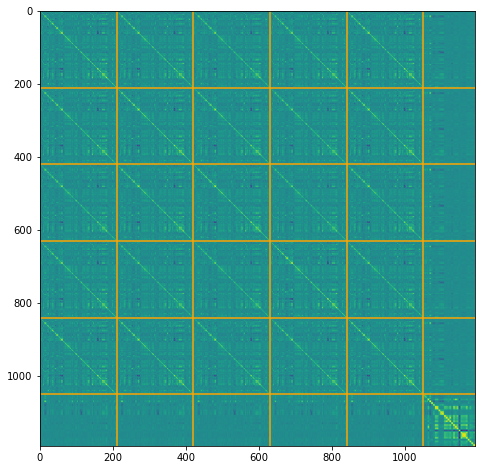

In [10]:
feature_correlations = df_trn[df_trn[ERA]==1][X_COLS].corr()
plt.figure(figsize = (8,8))
plt.imshow(feature_correlations)
for a in [210, 420, 630, 840, 1050]:
    plt.axvline(a, color='orange')
    plt.axhline(a, color='orange')

## Correlation of feature with target as a function of the era

In [11]:
def corrs_with_target(era):
    return np.corrcoef(df_trn[df_trn[ERA]==era][[Y_TRUE] + X_COLS].T)[0, 1:]

eras = df_trn[ERA].unique()
t_corrs = np.array([corrs_with_target(era) for era in eras])
t_corrs = pd.DataFrame(t_corrs)
t_corrs.rename(columns = dict(enumerate(X_COLS)), inplace=True)
t_corrs.insert(0, ERA, eras)

Text(0, 0.5, 'correlation with target')

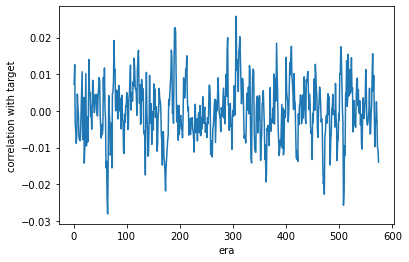

In [12]:
x = t_corrs[ERA]
y = t_corrs['feature_untidy_withdrawn_bargeman']

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel(ERA)
ax.set_ylabel('correlation with target')

# Notes for testing models

Performance metrics:

- correlation
- rank-correlation / spearman-correlation
- `sklearn.metrics.r2_score`
- `sklearn.metrics.mean_squared_error`

Models worth trying at first

- `sklearn.linear_model.LinearRegression()`
- `sklearn.linear_model.LogisticRegression()` (This doesn't work, it's only for classification - but some example uses it?)
- `sklearn.linear_model.SGDRegressor()` (Stochastic Gradient Descent regressor)
- `sklearn.linear_model.Lasso()`
- `sklearn.linear_model.ElasticNet()`
- `sklearn.linear_model.Ridge()`
- `sklearn.svm.SVR(kernel='rbf')` (Support Vector Machine / Regression)
- `sklearn.svm.SVR(kernel='linear')`
- `lightgbm.LGBMRegressor()`
- `xgboost.XGBRegressor()`

Ensembles

- `sklearn.ensemble.RandomForestRegressor()`
- `sklearn.ensemble.ExtraTreesRegressor()`
- `sklearn.ensemble.BaggingRegressor()`
- `sklearn.ensemble.AdaBoostRegressor()`
- `sklearn.ensemble.GradientBoostingRegressor()`